In [1]:
%matplotlib inline  
# To make data visualisations display in Jupyter Notebooks 
import numpy as np   # linear algebra
import pandas as pd  # Data processing, Input & Output load
import matplotlib.pyplot as plt # Visuvalization & plotting
import datetime  
import joblib  #Joblib is a set of tools to provide lightweight pipelining in Python (Avoid computing twice the same thing)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, recall_score, precision_score, make_scorer, accuracy_score, roc_curve, confusion_matrix, classification_report
#import pandas_profiling as pp   # simple and fast exploratory data analysis of a Pandas Datafram

import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.5f' % x) # scientific number to number


## Importing Data

In [65]:
# Read-in the dataset
Insurance_Data = pd.read_csv(r'C:\Users\USER\Desktop\Python Code\Ridge Regression by Irfan\Ridge_L2\carInsurance_data.csv')
print('Train Data Shape - ', Insurance_Data.shape)
Insurance_Data.head()

Train Data Shape -  (4000, 19)


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


We have 4000 customers of data with 19 columns to train the model and 1000 customers to test our model on. Here we will use the train and test data differently to train and test the model.

### Lets check the data type

In [3]:
# What type of values are stored in the columns?
Insurance_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

# EDA

### Let's check the summary fo data 

In [4]:
# Let's look at some statistical information about our dataframe.
Insurance_Data.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000
mean,2000.50000,41.21475,0.01450,1532.93725,0.49275,0.13300,15.72125,2.60725,48.70650,0.71750,0.40100
std,1154.84487,11.55019,0.11955,3511.45249,0.50001,0.33962,8.42531,3.06420,106.68538,2.07865,0.49016
min,1.00000,18.00000,0.00000,-3058.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,0.00000,0.00000
25%,1000.75000,32.00000,0.00000,111.00000,0.00000,0.00000,8.00000,1.00000,-1.00000,0.00000,0.00000
50%,2000.50000,39.00000,0.00000,551.50000,0.00000,0.00000,16.00000,2.00000,-1.00000,0.00000,0.00000
75%,3000.25000,49.00000,0.00000,1619.00000,1.00000,0.00000,22.00000,3.00000,-1.00000,0.00000,1.00000
max,4000.00000,95.00000,1.00000,98417.00000,1.00000,1.00000,31.00000,43.00000,854.00000,58.00000,1.00000


In [5]:
# This is how we can get summary for the categorical data
Insurance_Data.describe(include=np.object) 

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,3981,4000,3831,3098,4000,958,4000,4000
unique,11,3,3,2,12,3,3777,3764
top,management,married,secondary,cellular,may,failure,17:11:04,10:22:30
freq,893,2304,1988,2831,1049,437,3,3


### Univariate Analysis

**Lets analyse the data w.r.t our Target variable**

In [6]:
Target = 'CarInsurance'
pd.crosstab(Insurance_Data[Target], columns='N', normalize=True) # normalize=True means calculate %

col_0,N
CarInsurance,
0,0.59900
1,0.40100


**The data seems to be quiet good as we have approx. 40% of 1's in our data**

# Visualising Data - Bivariate Analysis

In [7]:
Insurance_Data=Insurance_Data.drop(['Id','CallStart', 'CallEnd'], axis=1)

In [8]:
# Lets drop columns which we will not use
num_cols = Insurance_Data.drop(['CarInsurance'],axis=1).select_dtypes(include=[np.number]).columns.tolist()
non_num_cols = Insurance_Data.select_dtypes(exclude=[np.number]).columns.tolist()


In [9]:
print('Numeric Columns \n', num_cols)
print('Non-Numeric Columns \n', non_num_cols)

Numeric Columns 
 ['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts']
Non-Numeric Columns 
 ['Job', 'Marital', 'Education', 'Communication', 'LastContactMonth', 'Outcome']


In [10]:
pd.crosstab(Insurance_Data.CarLoan,Insurance_Data[Target])

CarInsurance,0,1
CarLoan,,
0,2016,1452
1,380,152


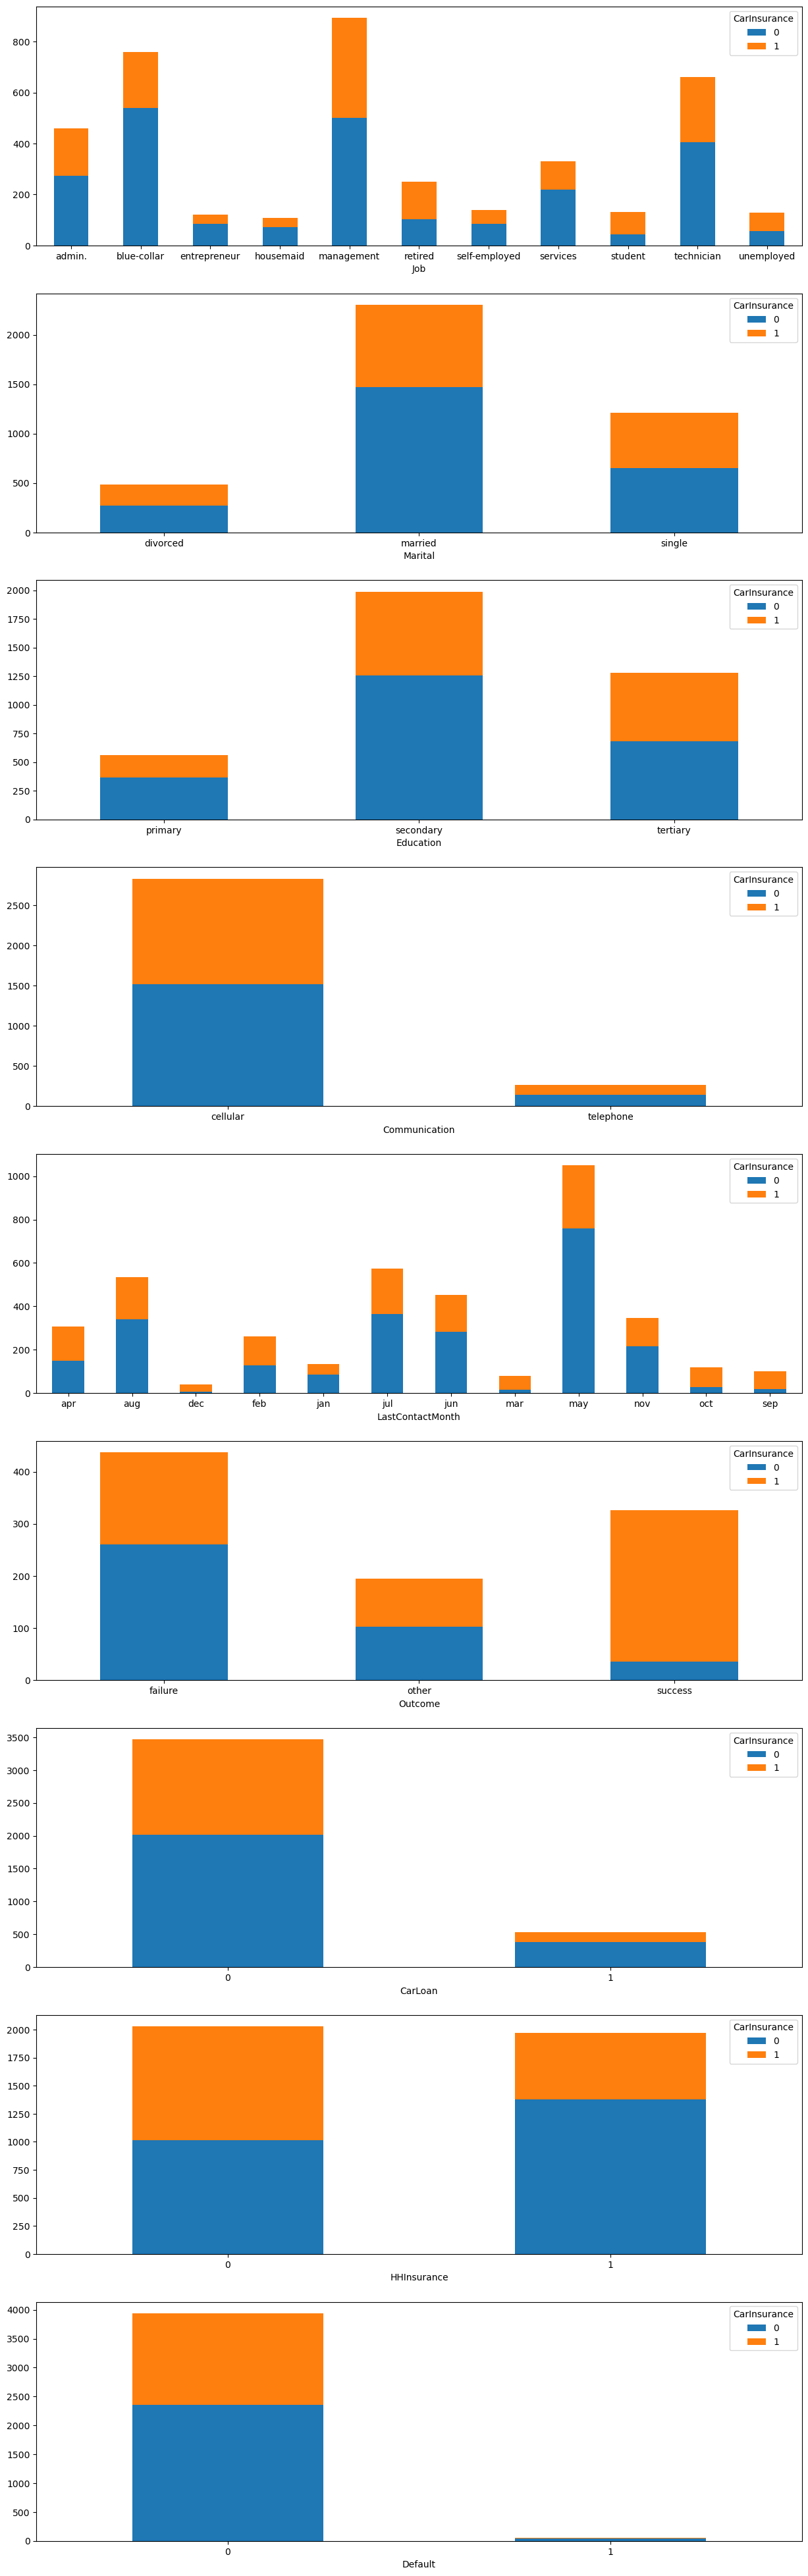

In [11]:
non_num_cols_viz = non_num_cols+['CarLoan', 'HHInsurance', 'Default']
fig, axes = plt.subplots(len(non_num_cols_viz), figsize=(15,50))
for i in range(len(non_num_cols_viz)):  # i = 0
    pd.crosstab(Insurance_Data[non_num_cols_viz[i]], Insurance_Data[Target]).plot(kind='bar', 
                                                                                  stacked=True, 
                                                                                  ax=axes[i],
   # sharex=False every plot should have different axis ax=axes[i],
                                                                                  rot=0)
    # rot =0 is to get label in proper readable format Horizontal
        

* Mar is better in term of Sales with ratio comparision

* May was better in term of Connection with Customer & highest count of sales in a Year

* The JobType='Retired' seem to have higher chance of buying insurance
* The Communication='cellular' seem to best way to reach out for insurance

## Identity & Treatment of Missing Values

In [12]:
Insurance_Data.isnull().sum()

Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CarInsurance           0
dtype: int64

**Looks like variables Job, Education, Communication & Outcome have missing values. Lets analyse them and treat them accordingly**

# Missing Values 

#### Job  , Communication ,Education

In [13]:
Insurance_Data=Insurance_Data.drop(['Outcome'], axis=1)

In [14]:
Insurance_Data.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,0
1,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,0
2,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,1
3,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,1
4,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,0


In [15]:
for column in ['Job','Communication','Education']:  # column = job
    Insurance_Data[column].fillna(Insurance_Data[column].mode()[0], inplace=True)

In [16]:
Insurance_Data.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
CarInsurance        0
dtype: int64

# Subset of data

* number subset 
* Categorical subset

In [17]:
Insurance_Data_num = Insurance_Data[num_cols+['CarInsurance']]
Insurance_Data_num.head(3)

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,32,0,1218,1,0,28,2,-1,0,0
1,32,0,1156,1,0,26,5,-1,0,0
2,29,0,637,1,0,3,1,119,1,1


In [18]:
# Categorical columns data
Insurance_Data_cat = Insurance_Data[non_num_cols[0:5]]
Insurance_Data_cat.head(3)

,Job,Marital,Education,Communication,LastContactMonth
0,management,single,tertiary,telephone,jan
1,blue-collar,married,primary,cellular,may
2,management,single,tertiary,cellular,jun


In [19]:
# Create dummies
Insurance_Data_cat_dummies = pd.get_dummies(Insurance_Data_cat,prefix="",prefix_sep="")
print(Insurance_Data_cat_dummies.shape)
Insurance_Data_cat_dummies.head()

(4000, 31)


,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Merge the 2 File (number & Categorical)

In [20]:
Insurance_Data_final = pd.concat([Insurance_Data_num, Insurance_Data_cat_dummies], axis=1)
print(Insurance_Data_final.shape)
Insurance_Data_final.head()

(4000, 41)


,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,32,0,1218,1,0,28,2,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,0,1156,1,0,26,5,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,29,0,637,1,0,3,1,119,1,1,...,0,0,0,0,1,0,0,0,0,0
3,25,0,373,1,0,11,2,-1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,30,0,2694,0,0,3,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,0


## Data Partition

In [21]:
X = Insurance_Data_final.drop(['CarInsurance'], axis=1)
Y = Insurance_Data_final['CarInsurance']

#random_state is the seed used by the random number generator. It can be any integer.
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7 , random_state=100)

In [22]:
print('Train shape - ', X_train.shape)
print('Test shape  - ', X_test.shape)

Train shape -  (2800, 40)
Test shape  -  (1200, 40)


## Model Building 1 -- Ridge ( L2 )

In [23]:
from sklearn.linear_model import RidgeClassifier,Ridge

In [24]:
final_mod = RidgeClassifier(alpha=2) # randomly aplha (lambda) > 0 

In [25]:
final_mod.fit(X_train, y_train)

RidgeClassifier(alpha=2)

### Coefficent of Model

In [26]:
print(final_mod.intercept_)    # Beta0

[0.18343346]


In [27]:
print(final_mod.coef_)  # Beta1 , Beta2 , Beta3

[[ 2.56071974e-03 -5.73797731e-02  7.53640916e-07 -2.70280257e-01
  -1.49623330e-01 -4.53769319e-03 -2.24419600e-02  3.21402858e-04
   4.02217744e-02  2.45724536e-04 -5.23431207e-02 -1.66490214e-01
  -6.77653979e-02 -4.96552375e-02  1.38797417e-01 -2.20564215e-01
  -4.80207249e-04  2.35759804e-01 -4.12507278e-02  2.23746174e-01
   5.47177858e-02 -1.07185087e-01  5.24673015e-02 -5.92698748e-02
  -4.07944018e-02  1.00064277e-01 -2.70036617e-02  2.70036617e-02
   9.52411985e-02 -2.70532856e-01  3.50003537e-01 -3.44553264e-02
  -3.48006410e-01 -1.50030025e-01 -2.55419989e-01  4.53963025e-01
  -2.86285398e-01 -2.80024566e-01  3.98884109e-01  3.26662702e-01]]


In [69]:
list(final_mod.coef_)

[array([ 2.56071974e-03, -5.73797731e-02,  7.53640916e-07, -2.70280257e-01,
        -1.49623330e-01, -4.53769319e-03, -2.24419600e-02,  3.21402858e-04,
         4.02217744e-02,  2.45724536e-04, -5.23431207e-02, -1.66490214e-01,
        -6.77653979e-02, -4.96552375e-02,  1.38797417e-01, -2.20564215e-01,
        -4.80207249e-04,  2.35759804e-01, -4.12507278e-02,  2.23746174e-01,
         5.47177858e-02, -1.07185087e-01,  5.24673015e-02, -5.92698748e-02,
        -4.07944018e-02,  1.00064277e-01, -2.70036617e-02,  2.70036617e-02,
         9.52411985e-02, -2.70532856e-01,  3.50003537e-01, -3.44553264e-02,
        -3.48006410e-01, -1.50030025e-01, -2.55419989e-01,  4.53963025e-01,
        -2.86285398e-01, -2.80024566e-01,  3.98884109e-01,  3.26662702e-01])]

In [72]:
coefs = pd.DataFrame(list(final_mod.coef_.ravel()),list(final_mod.feature_names_in_)).reset_index()
coefs.columns = ['feature', 'coefficient']
#coefs = coefs.sort_values(by='coefficient', ascending=False)
coefs

,feature,coefficient
0,Age,0.00256
1,Default,-0.05738
2,Balance,0.00000
3,HHInsurance,-0.27028
4,CarLoan,-0.14962
5,LastContactDay,-0.00454
6,NoOfContacts,-0.02244
7,DaysPassed,0.00032
8,PrevAttempts,0.04022
9,admin.,0.00025


## Predictions on Train Dataset

In [73]:
train=pd.concat([X_train,y_train],axis=1)  # Index number
train['Predicted']=final_mod.predict(X_train)
train.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,admin.,...,jan,jul,jun,mar,may,nov,oct,sep,CarInsurance,Predicted
2471,67,0,1146,0,0,13,1,92,2,0,...,0,0,0,0,0,1,0,0,1,1
2190,35,0,2646,0,0,14,8,183,2,0,...,0,0,0,0,0,0,0,0,1,1
1146,38,0,19,1,0,30,2,-1,0,1,...,0,0,0,0,1,0,0,0,1,0
3355,40,0,35,0,0,3,4,317,3,0,...,0,1,0,0,0,0,0,0,0,1
3926,46,0,57,0,0,28,1,-1,0,0,...,0,0,0,0,1,0,0,0,1,0


## Model Performance Metrics

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Predicted'],train['CarInsurance'])
print(confusion_matrix)

[[1436  619]
 [ 227  518]]


In [64]:
Accuracy_Train=((1436+518)/(2800)*100)
print(Accuracy_Train)

69.78571428571428


In [32]:
print('Classification report for train data is : \n',
      classification_report(train['Predicted'],train['CarInsurance']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.86      0.70      0.77      2055
           1       0.46      0.70      0.55       745

    accuracy                           0.70      2800
   macro avg       0.66      0.70      0.66      2800
weighted avg       0.75      0.70      0.71      2800



## Predictions on Test Dataset

In [74]:
test=pd.concat([X_test,y_test],axis=1)
test['Predicted']=final_mod.predict(X_test)
test.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,admin.,...,jan,jul,jun,mar,may,nov,oct,sep,CarInsurance,Predicted
3218,35,0,3168,0,0,22,30,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
883,29,0,723,0,1,17,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0
367,33,0,647,1,1,4,1,273,1,0,...,0,0,0,0,0,0,0,0,0,0
2226,45,0,3007,0,0,11,1,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
2578,34,0,3404,1,0,8,1,139,5,0,...,0,0,0,0,0,0,0,0,0,1


## Model Performance Test data

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['CarInsurance'])
print(confusion_matrix)

[[650 260]
 [ 83 207]]


In [35]:
Accuracy_Test=((651+231)/(1200)*100)
print(Accuracy_Test)

73.5


In [36]:
print('Classification report for test data is : \n',
      classification_report(test['Predicted'],test['CarInsurance']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.89      0.71      0.79       910
           1       0.44      0.71      0.55       290

    accuracy                           0.71      1200
   macro avg       0.67      0.71      0.67      1200
weighted avg       0.78      0.71      0.73      1200



* Model is Good fit on Train datast  & its Performance in Test dataset is also good

# Out of Sample Prediction  - Live Data

In [37]:
# Load the test data
Insurance_test = pd.read_csv(r'C:\Users\USER\Desktop\Python Code\Ridge Regression by Irfan\Ridge_L2\carInsurance_Live.csv')
print('Test Data Shape  - ', Insurance_test.shape)
Insurance_test.head()

Test Data Shape  -  (1000, 18)


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd
0,4001,25,admin.,single,secondary,0,1,1,1,NaN,12,may,12,-1,0,NaN,17.17.42,17.18.06
1,4002,40,management,married,tertiary,0,0,1,1,cellular,24,jul,1,-1,0,NaN,9.13.44,9.14.37
2,4003,44,management,single,tertiary,0,-1313,1,1,cellular,15,may,10,-1,0,NaN,15.24.07,15.25.51
3,4004,27,services,single,secondary,0,6279,1,0,cellular,9,nov,1,-1,0,NaN,9.43.44,9.48.01
4,4005,53,technician,married,secondary,0,7984,1,0,cellular,2,feb,1,-1,0,NaN,16.31.51,16.34.22


# # Handle missing values on the Live data


In [38]:
Insurance_test.isnull().sum()

Id                    0
Age                   0
Job                   5
Marital               0
Education            47
Default               0
Balance               0
HHInsurance           0
CarLoan               0
Communication       221
LastContactDay        0
LastContactMonth      0
NoOfContacts          0
DaysPassed            0
PrevAttempts          0
Outcome             757
CallStart             0
CallEnd               0
dtype: int64

In [39]:
Insurance_test=Insurance_test.drop(['Outcome','Id','CallStart','CallEnd'], axis=1) # same variable is removed in Training 

In [40]:
for column in ['Job','Communication','Education']: 
    Insurance_test[column].fillna(Insurance_test[column].mode()[0], inplace=True)

In [41]:
Insurance_test.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
dtype: int64

# Converting to Dummies

In [42]:
# Convert Categorical to dummies
dummy_cols = pd.get_dummies(Insurance_test[non_num_cols[0:5]],prefix="",prefix_sep="")
dummy_cols.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [43]:
# Append the columns
new_data = pd.concat([Insurance_test[num_cols], dummy_cols], axis=1)
print(new_data.shape)
new_data.head()

(1000, 40)


,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,admin.,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,25,0,1,1,1,12,12,-1,0,1,...,0,0,0,0,0,0,1,0,0,0
1,40,0,0,1,1,24,1,-1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,44,0,-1313,1,1,15,10,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,27,0,6279,1,0,9,1,-1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,53,0,7984,1,0,2,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0


# Prediction on Live data

In [44]:
new_data_final= new_data.copy()

In [45]:
new_data_final['Predicted'] = final_mod.predict(new_data_final) 
new_data_final.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,admin.,...,feb,jan,jul,jun,mar,may,nov,oct,sep,Predicted
0,25,0,1,1,1,12,12,-1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,40,0,0,1,1,24,1,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,44,0,-1313,1,1,15,10,-1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,27,0,6279,1,0,9,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,0,7984,1,0,2,1,-1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [46]:
new_data_final.Predicted.value_counts()

0    737
1    263
Name: Predicted, dtype: int64

In [75]:
263/1000

0.263

In [47]:
# Export the results
new_data_final.to_csv('Predicted_by_irfan.csv', index=False)

#   Model Building - Lasso Regression ( L1 )

### Data Partition

In [48]:
Insurance_Data_final.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,32,0,1218,1,0,28,2,-1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,32,0,1156,1,0,26,5,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,29,0,637,1,0,3,1,119,1,1,...,0,0,0,0,1,0,0,0,0,0
3,25,0,373,1,0,11,2,-1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,30,0,2694,0,0,3,1,-1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [49]:
X = Insurance_Data_final.drop(['CarInsurance'], axis=1)
Y = Insurance_Data_final['CarInsurance']

#random_state is the seed used by the random number generator. It can be any integer.
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y, train_size=0.7 , random_state=100)

In [50]:
print('Train shape - ', X_train.shape)
print('Test shape  - ', X_test.shape)

Train shape -  (2800, 40)
Test shape  -  (1200, 40)


In [51]:
from sklearn.linear_model import LassoCV

In [52]:
Lasso_mod = LassoCV()  #Alpha = Lambda

In [53]:
model=Lasso_mod.fit(X_train, y_train)

from sklearn.linear_model import Lasso
model = Lasso(alpha=0.1,fit_intercept=True)

### Best Alpha value Selected

In [54]:
model.alpha_  # Lambda value 

0.05149284897959184

### Coefficent of Model

In [55]:
model.intercept_ # Beta0

0.3630135187970019

In [56]:
model.coef_  # Beta1, Beta2 , Beta3

array([ 1.51595732e-03, -0.00000000e+00,  3.22304140e-06, -0.00000000e+00,
       -0.00000000e+00, -1.49276916e-03, -1.01117804e-02,  4.00096061e-04,
        1.01435363e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [57]:
coef2 = pd.DataFrame(list(model.coef_.ravel()),list(model.feature_names_in_)).reset_index()
coef2.columns = ['Variable', 'coefficient']
coef2 = coef2.sort_values(by='coefficient', ascending=False)
coef2

,Variable,coefficient
8,PrevAttempts,0.01014
0,Age,0.00152
7,DaysPassed,0.00040
2,Balance,0.00000
31,feb,0.00000
24,secondary,-0.00000
25,tertiary,0.00000
26,cellular,-0.00000
27,telephone,0.00000
28,apr,0.00000


## Predictions on Train Dataset

In [58]:
train_lasso=pd.concat([X_train,y_train],axis=1)
train_lasso['Probability']=model.predict(X_train)  # 46
train_lasso.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,admin.,...,jan,jul,jun,mar,may,nov,oct,sep,CarInsurance,Probability
2471,67,0,1146,0,0,13,1,92,2,0,...,0,0,0,0,0,1,0,0,1,0.49585
2190,35,0,2646,0,0,14,8,183,2,0,...,0,0,0,0,0,0,0,0,1,0.41631
1146,38,0,19,1,0,30,2,-1,0,1,...,0,0,0,0,1,0,0,0,1,0.35527
3355,40,0,35,0,0,3,4,317,3,0,...,0,1,0,0,0,0,0,0,0,0.53610
3926,46,0,57,0,0,28,1,-1,0,0,...,0,0,0,0,1,0,0,0,1,0.38062


In [59]:
train_lasso['Predicted']= np.where(train_lasso['Probability'] >= 0.7,1,0)  #thershold  >0.7
train_lasso.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,admin.,...,jul,jun,mar,may,nov,oct,sep,CarInsurance,Probability,Predicted
2471,67,0,1146,0,0,13,1,92,2,0,...,0,0,0,0,1,0,0,1,0.49585,0
2190,35,0,2646,0,0,14,8,183,2,0,...,0,0,0,0,0,0,0,1,0.41631,0
1146,38,0,19,1,0,30,2,-1,0,1,...,0,0,0,1,0,0,0,1,0.35527,0
3355,40,0,35,0,0,3,4,317,3,0,...,1,0,0,0,0,0,0,0,0.53610,0
3926,46,0,57,0,0,28,1,-1,0,0,...,0,0,0,1,0,0,0,1,0.38062,0


## Model Performance Metrics

In [60]:
print('Classification report for train data is : \n',
      classification_report(train_lasso['Predicted'],train_lasso['CarInsurance']))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       1.00      0.60      0.75      2791
           1       0.01      0.89      0.01         9

    accuracy                           0.60      2800
   macro avg       0.50      0.74      0.38      2800
weighted avg       1.00      0.60      0.74      2800



* Model is bad fit to Training 

## Predictions on Test Dataset

In [61]:
test=pd.concat([X_test,y_test],axis=1)
test['Probability']=model.predict(X_test)
test.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,admin.,...,jan,jul,jun,mar,may,nov,oct,sep,CarInsurance,Probability
3218,35,0,3168,0,0,22,30,-1,0,0,...,0,0,0,0,0,0,0,0,0,0.08969
883,29,0,723,0,1,17,1,-1,0,0,...,0,1,0,0,0,0,0,0,0,0.37342
367,33,0,647,1,1,4,1,273,1,0,...,0,0,0,0,0,0,0,0,0,0.51841
2226,45,0,3007,0,0,11,1,-1,0,0,...,0,0,1,0,0,0,0,0,0,0.41399
2578,34,0,3404,1,0,8,1,139,5,0,...,0,0,0,0,0,0,0,0,0,0.50980


In [62]:
test['Predicted']=np.where(test['Probability'] >= 0.7,1,0) 
test.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,admin.,...,jul,jun,mar,may,nov,oct,sep,CarInsurance,Probability,Predicted
3218,35,0,3168,0,0,22,30,-1,0,0,...,0,0,0,0,0,0,0,0,0.08969,0
883,29,0,723,0,1,17,1,-1,0,0,...,1,0,0,0,0,0,0,0,0.37342,0
367,33,0,647,1,1,4,1,273,1,0,...,0,0,0,0,0,0,0,0,0.51841,0
2226,45,0,3007,0,0,11,1,-1,0,0,...,0,1,0,0,0,0,0,0,0.41399,0
2578,34,0,3404,1,0,8,1,139,5,0,...,0,0,0,0,0,0,0,0,0.50980,0


## Model Performance Test data

In [63]:
print('Classification report for test data is : \n',
      classification_report(test['Predicted'],test['CarInsurance']))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       1.00      0.61      0.76      1196
           1       0.01      0.75      0.01         4

    accuracy                           0.61      1200
   macro avg       0.50      0.68      0.39      1200
weighted avg       1.00      0.61      0.76      1200



* Model is Bad fit on Train datast  & its Performance in Test dataset is also Bad, Live = bad

# Finished